In [4]:
# Importing dependencies
import pandas as pd
import numpy as np
import warnings
import scipy.stats as st
warnings.filterwarnings('ignore')
from scipy.stats import linregress
from matplotlib import pyplot as plt, ticker as mticker
from matplotlib.ticker import StrMethodFormatter
from adjustText import adjust_text
from matplotlib.lines import Line2D 
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
from matplotlib.ticker import FormatStrFormatter

In [7]:
# Reading .csv files
final_mean_df = pd.read_csv('Resources/final_combined_variables_world_happiness.csv')
final_mean_df.head()

,Unnamed: 0,Country Name,Country Code,Region,Happiness Score,Life Expectancy,Suicide Rate,Unemployment Rate,Net National Income per capita,GDP per capita,Consumer Price Inflation
0,1,Albania,ALB,europe,5.199,79.003400,4.60,14.0000,1.094844e+10,1.336520e+10,2.277370e+09
1,2,Algeria,DZA,africa,5.122,75.927400,2.56,10.5352,1.349940e+11,1.685580e+11,3.319580e+10
2,4,Armenia,ARM,europe,5.399,74.901800,4.06,18.1700,1.039242e+10,1.174083e+10,2.110668e+09
3,5,Australia,AUS,asia,7.162,82.599512,12.68,5.5620,1.040770e+12,1.340840e+12,2.701240e+11
4,6,Austria,AUT,europe,7.163,81.612683,15.44,5.3140,3.400930e+11,4.189360e+11,7.639420e+10


In [8]:
# remove duplicated columns
final_mean_df = final_mean_df.drop(columns=['Unnamed: 0'])

#rename columns
final_mean_df = final_mean_df.rename(columns={'Net National Income per capita': 'Net National Income Total', 
                                              'GDP per capita':'GDP Total'})
final_mean_df.head()

,Country Name,Country Code,Region,Happiness Score,Life Expectancy,Suicide Rate,Unemployment Rate,Net National Income Total,GDP Total,Consumer Price Inflation
0,Albania,ALB,europe,5.199,79.003400,4.60,14.0000,1.094844e+10,1.336520e+10,2.277370e+09
1,Algeria,DZA,africa,5.122,75.927400,2.56,10.5352,1.349940e+11,1.685580e+11,3.319580e+10
2,Armenia,ARM,europe,5.399,74.901800,4.06,18.1700,1.039242e+10,1.174083e+10,2.110668e+09
3,Australia,AUS,asia,7.162,82.599512,12.68,5.5620,1.040770e+12,1.340840e+12,2.701240e+11
4,Austria,AUT,europe,7.163,81.612683,15.44,5.3140,3.400930e+11,4.189360e+11,7.639420e+10


In [5]:
# Remove scientific notation
pd.options.display.float_format = '{:,.2f}'.format

# Capitalize first letter of items in region category
final_mean_df['Region'] = final_mean_df['Region'].str.capitalize()
final_mean_df.head()
final_mean_df.sort_values('GDP Total', ascending=False)

,Country Name,Country Code,Region,Happiness Score,Life Expectancy,Suicide Rate,Unemployment Rate,Net National Income Total,GDP Total,Consumer Price Inflation
107,United States,USA,Americas,6.98,78.64,15.44,4.42,"16,846,900,000,000.00","19,658,500,000,000.00","3,641,200,000,000.00"
21,China,CHN,Asia,5.58,77.43,8.12,4.48,"9,442,290,000,000.00","12,556,000,000,000.00","2,212,320,000,000.00"
52,Japan,JPN,Asia,6.04,84.09,17.12,2.82,"3,849,520,000,000.00","4,908,120,000,000.00","888,986,000,000.00"
39,Germany,DEU,Europe,7.03,80.96,12.82,3.80,"3,108,430,000,000.00","3,676,190,000,000.00","671,518,000,000.00"
35,France,FRA,Europe,6.69,82.59,14.66,9.45,"2,188,760,000,000.00","2,605,430,000,000.00","487,838,000,000.00"
...,...,...,...,...,...,...,...,...,...,...
66,Mauritania,MRT,Africa,4.15,65.07,3.06,10.30,"6,108,063,549.00","6,981,083,050.00","1,233,371,528.00"
103,Togo,TGO,Africa,4.11,60.05,9.10,3.27,"5,468,357,113.00","6,188,113,378.00","836,173,235.80"
32,Eswatini,SWZ,Africa,4.40,57.91,31.24,22.89,"3,358,320,838.00","4,288,547,704.00","812,649,138.50"
59,Lesotho,LSO,Africa,3.51,52.87,81.34,23.15,"2,222,963,715.00","2,357,681,286.00","471,951,964.00"


In [6]:
# verify that there is no null values 
final_mean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country Name               111 non-null    object 
 1   Country Code               111 non-null    object 
 2   Region                     111 non-null    object 
 3   Happiness Score            111 non-null    float64
 4   Life Expectancy            111 non-null    float64
 5   Suicide Rate               111 non-null    float64
 6   Unemployment Rate          111 non-null    float64
 7   Net National Income Total  111 non-null    float64
 8   GDP Total                  111 non-null    float64
 9   Consumer Price Inflation   111 non-null    float64
dtypes: float64(7), object(3)
memory usage: 8.8+ KB


In [7]:
# save new csv file
final_mean_df.to_csv('Resources/final_mean_df.csv', index=True)

In [8]:
# create summary statistics 
final_mean_df.describe()

,Happiness Score,Life Expectancy,Suicide Rate,Unemployment Rate,Net National Income Total,GDP Total,Consumer Price Inflation
count,111.00,111.00,111.00,111.00,111.00,111.00,111.00
mean,5.63,73.10,10.32,7.08,"530,178,314,860.62","649,469,736,105.94","118,838,288,633.40"
std,1.06,7.58,9.29,5.28,"1,886,753,329,165.80","2,279,525,309,415.65","416,427,030,010.32"
min,3.27,52.33,1.54,0.31,"1,158,688,946.00","1,570,389,083.00","275,635,379.40"
25%,4.91,68.24,5.19,3.79,"19,097,670,016.50","23,043,522,533.50","4,088,895,786.00"
50%,5.74,74.38,8.14,5.45,"65,164,026,333.00","80,167,736,877.00","12,917,867,005.00"
75%,6.37,78.82,12.75,9.08,"281,631,500,000.00","343,480,500,000.00","61,445,000,001.00"
max,7.82,84.09,81.34,26.82,"16,846,900,000,000.00","19,658,500,000,000.00","3,641,200,000,000.00"


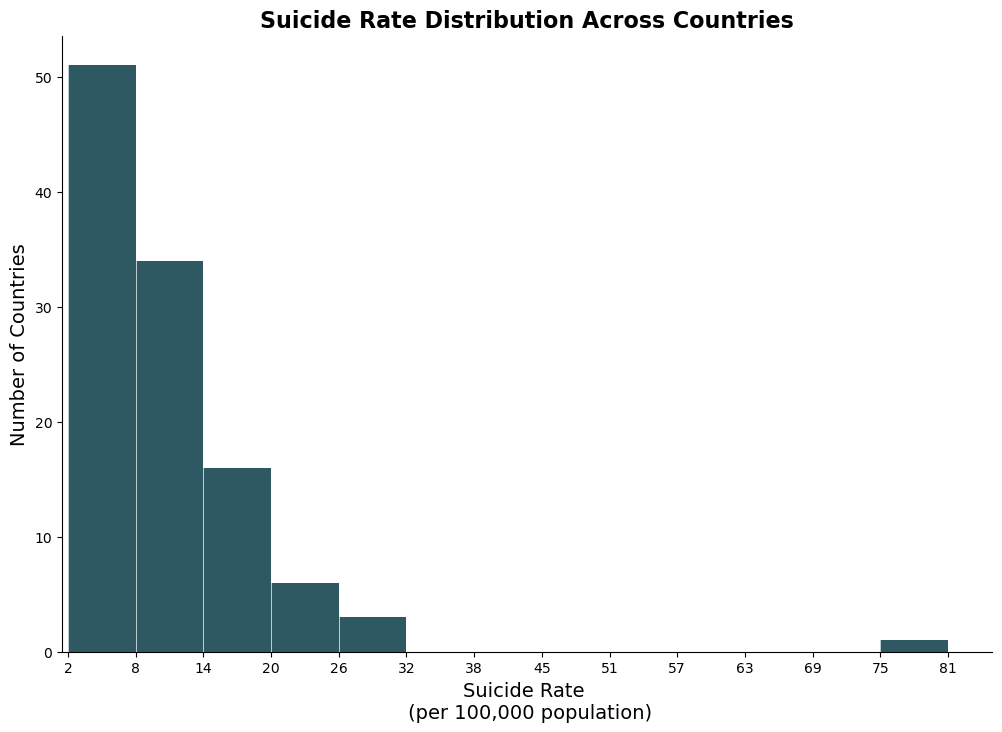

In [13]:
# create hist to show distribution of mean suicide rate across countries 
suicide_mean = final_mean_df['Suicide Rate']

# plotting histogram
fig, ax = plt.subplots(figsize=(12,8))

# assigning bins 
counts, bins, patches = ax.hist(final_mean_df['Suicide Rate'], bins='doane', color='#2e5962')

# assigning bins to xticks
ax.set_xticks(bins)

# format xticks values 
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))


# adding gridlines to x-axis
plt.grid(color='white', lw = 0.5, axis='x')

# histogram title, x and y labels
plt.xlabel("Suicide Rate \n (per 100,000 population)", fontsize=14)
plt.ylabel("Number of Countries", fontsize=14)

#plt.ticklabel_format(useMathText=True)
plt.title('Suicide Rate Distribution Across Countries', weight='bold', fontsize=16)

# hide the right and top spines
ax.spines[['top', 'right']].set_visible(False)

# adjust x-axis 
ax.set_xlim(xmin=1)

plt.savefig('output/suicide_distribution.png', dpi=800)
plt.show()

# print(plt.style.available)
# print(bins)

In [14]:
# Run the normality test on the whole Suicide_mean DataFrame                                                                           
print(st.normaltest(suicide_mean.sample(111)))
# If the p-value is 0.05 or lower, the result is trumpeted as significant, 
# but if it is higher than 0.05, the result is non-significant and tends to be passed over in silence

NormaltestResult(statistic=139.91007787729598, pvalue=4.15826925889184e-31)


In [15]:
# calculate standard dviation and mean of means
sd_sr = np.std(suicide_mean,ddof = 0)
mean_sr = np.mean(suicide_mean)
print(f"The suicide mean standard deviation is {sd_sr}")
print(f'The average suicide rating is {mean_sr}')

The suicide mean standard deviation is 9.243902061061858
The average suicide rating is 10.320900900900902


In [16]:
final_mean_df['Region'].value_counts()

Europe      35
Africa      30
Asia        27
Americas    19
Name: Region, dtype: int64

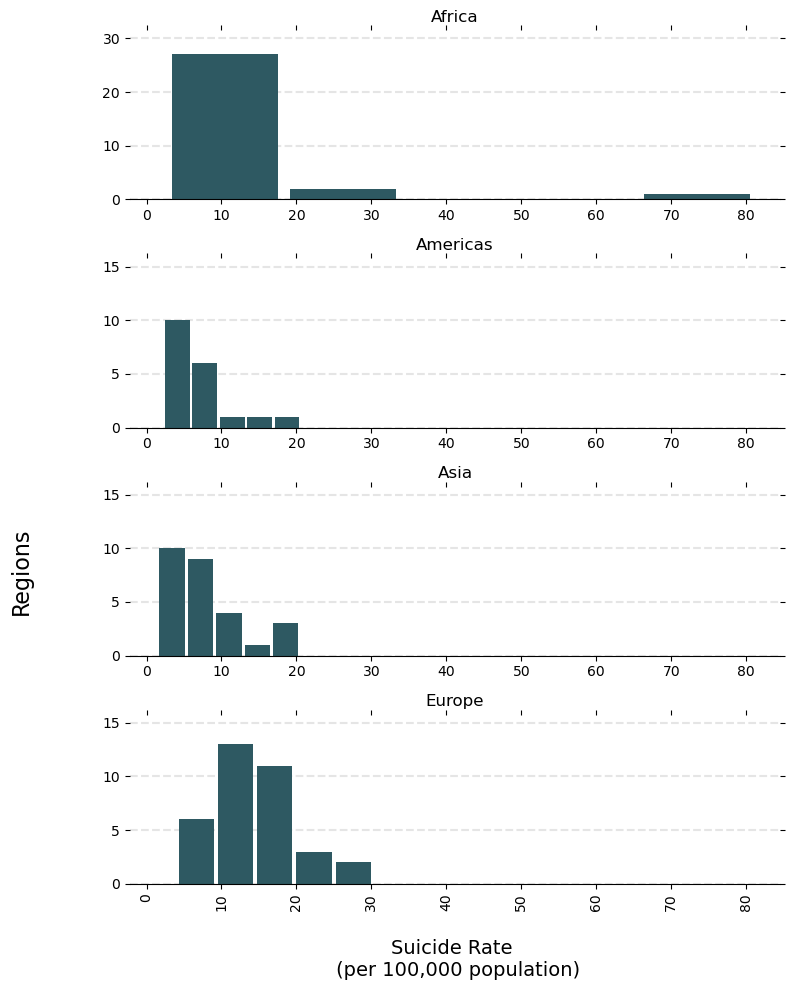

In [36]:
ax = final_mean_df.hist(column='Suicide Rate', by='Region', bins=5, grid=False, figsize=(8,10), layout=(4,1), sharex=True, color='#2e5962', zorder=2, rwidth=0.9)

for i,x in enumerate(ax):

    # remove spines
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # ticks off
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#BEBEBE', zorder=1)

    # x-axis label
    x.set_xlabel("Suicide Rate \n (per 100,000 population)", labelpad=20, size=14)

    # Set y-axis label
    if i == 2:
        x.set_ylabel("Regions", labelpad=50, size=16)
        
plt.tight_layout()        
plt.savefig('output/suicide_distributionby_region.png', dpi=600)
plt.show()

In [28]:
# function to plot Linear Regression
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos):
    from matplotlib.pyplot import figure
    import datetime
    
    # calculating linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # plotting
    fig, ax = plt.subplots()
    ax.scatter(xdata, ydata, color=colors, edgecolors=edge_col,
    s=300, alpha=0.5,  zorder=10)
    
    # lin reg line
    plt.plot(xdata, regress_values, color='#a00705')
    
    # add grid lines, only for y axis
    ax.grid(axis='y', alpha=0.3)
    
    # place formula on the graph
    plt.annotate(line_eq,lblpos,fontsize=27,color="#f58800")
    
    # omit scientific notation
    plt.ticklabel_format(useMathText=True)
    
    # set y-axis limit and both axis labels
    plt.ylim(0,90)
    plt.xlabel(xlbl, fontsize=18)
    plt.ylabel(ylbl, fontsize=18)
    
    #set fig sixe
    fig.set_size_inches(15, 10)
        
    # remove tick marks on both x and y axes
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)   

    # remove all spines except the bottom one
    ax.spines["left"].set_color("none")
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    
    # establish regions for plotting
    regions = ["Africa", "Americas", "Asia", "Europe"]

    # create handles for lines.
    handles = [
        Line2D(
            [], [], label=label,
            lw=0, 
            marker="o", 
            markersize=20, 
            # color
            markerfacecolor=reg_col[idx])
        
        for idx, label in enumerate(regions)]

    # append a handle for the line
    handles += [Line2D([], [], label='Regions')]

    # add legend 
    legend = fig.legend(
    handles=handles,
    # location
    bbox_to_anchor=[0.5, 0.95],
    fontsize=12,
    # space between the text and the marker
    handletextpad=0.6, 
    handlelength=1.4, 
    columnspacing=1.4,
    loc="center", 
    ncol=5,
    frameon=False)
    
    # countries
    countries = final_mean_df['Country Name'].values
    
    # select countries to grath
    graph_countries = ["Finland", "Russian Federation", "Ukraine", "Lesotho", "Eswatini", 
    "Lithuania", "Gabon", "Japan", "Italy", "United States"]

    # add labels
    items = []
    for idx, country in enumerate(countries):
        # append only selected countries
        if country in graph_countries:
            x, y = xdata[idx], ydata[idx]
            items.append(ax.text(x, y, country, fontsize=12));

    adjust_text(
        items, 
        expand_points=(5, 5),
        # arrow properties like no pointer
        arrowprops=dict(arrowstyle="-", lw=1),
        ax=ax)
    
    # save each graph with a new data point using datetimemodule
    # fig.savefig(r'output\lin_reg_' + str(datetime.datetime.now().strftime('%f'))+'.png')
    
    return fig 

In [29]:
# function to adjust lightness of colors 
def adjust_lightness(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], c[1] * amount, c[2])

In [30]:
# pick colors
reg_col = ["#2e5962", "#ffce7d", "#ea7f7f", "#a394ce"]

# categories fo colors
cat_codes = pd.Categorical(final_mean_df['Region']).codes

# colors for each region according to its category.
colors = np.array(reg_col)[cat_codes]

# darker shades of colors for edges 
edge_col = [adjust_lightness(color, 0.6) for color in colors] 

The r-squared is: 0.34102888289366196


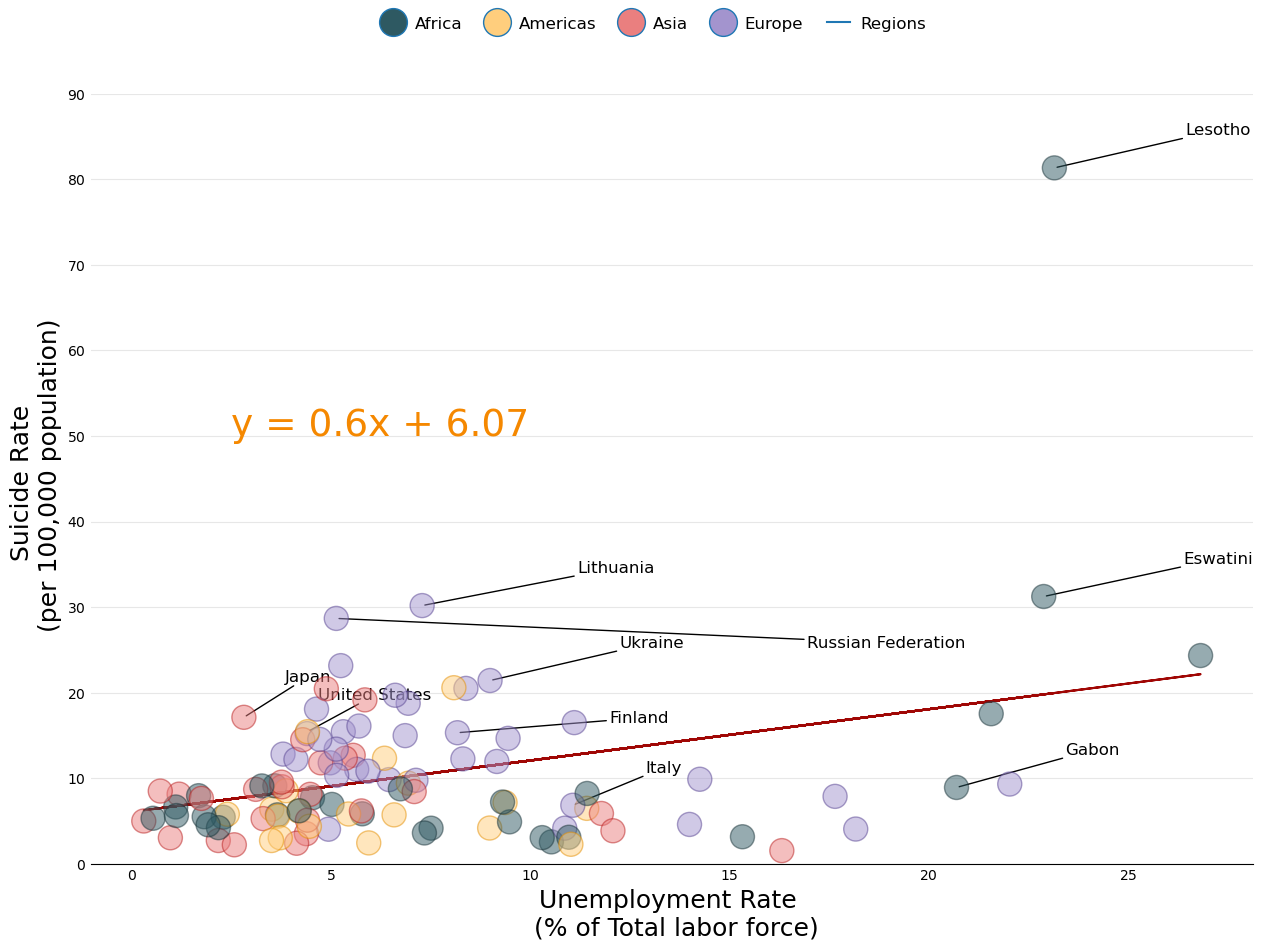

In [31]:
# Linear regression for Unemployment and Suicide Rate
xlbl = 'Unemployment Rate \n (% of Total labor force)'
ylbl = 'Suicide Rate \n (per 100,000 population)'
lblpos = (2.5, 50)
unemp_suic_plt = plotLinearRegression(final_mean_df['Unemployment Rate'],final_mean_df['Suicide Rate'],xlbl,ylbl,lblpos)
plt.savefig('output/unemp_suic_lin_reg.png', dpi=800)

The r-squared is: -0.06989942586822688


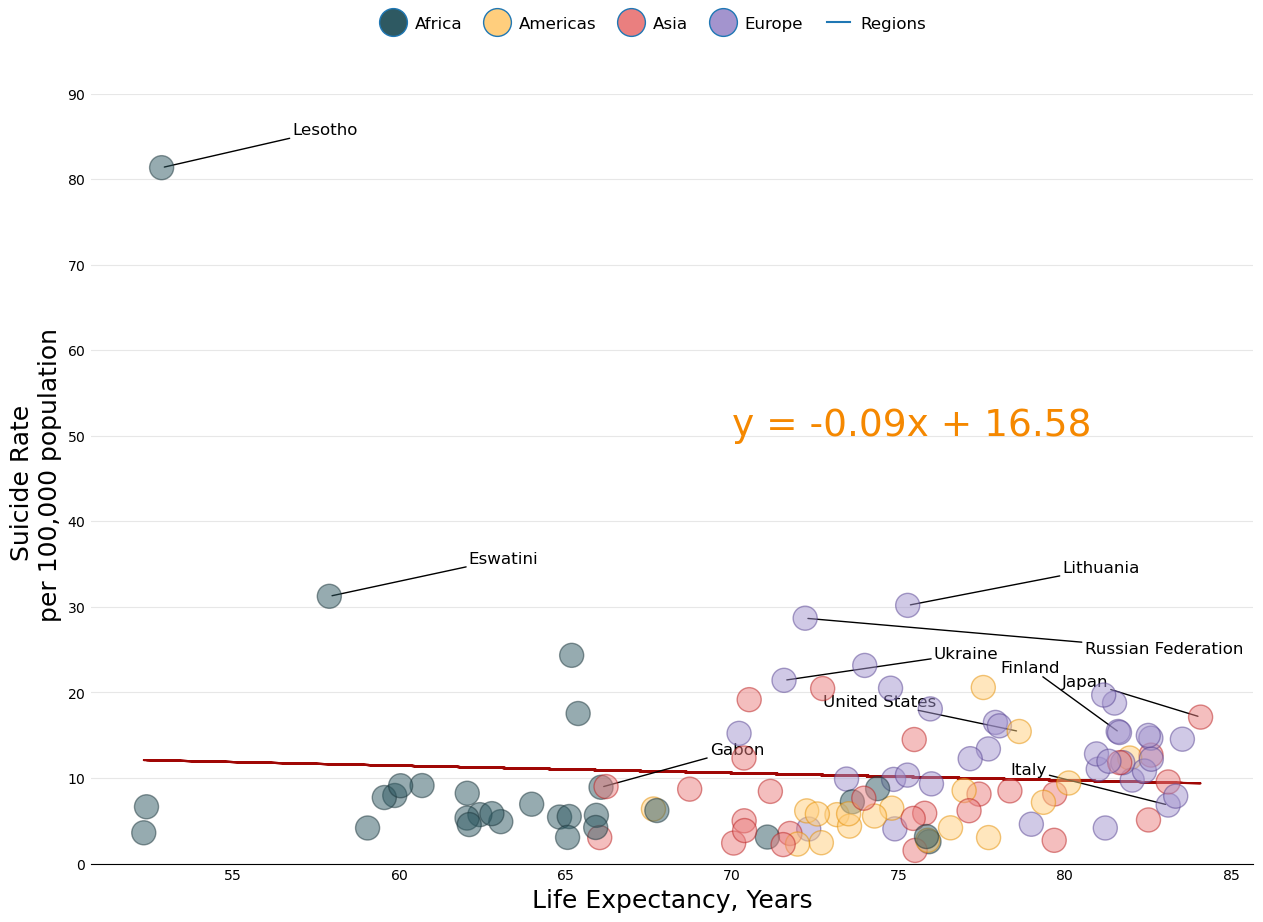

In [32]:
# Linear regression for Life Expectancy and Suicide Rate
xlbl = "Life Expectancy, Years"
ylbl = "Suicide Rate \n per 100,000 population"
lblpos = (70, 50)
lifeexp_suic_plt = plotLinearRegression(final_mean_df['Life Expectancy'],final_mean_df['Suicide Rate'],xlbl,ylbl,lblpos)
plt.savefig('output/lifeexp_suic_lin_reg.png', dpi=800)
plt.show()

The r-squared is: 0.05812491230140824


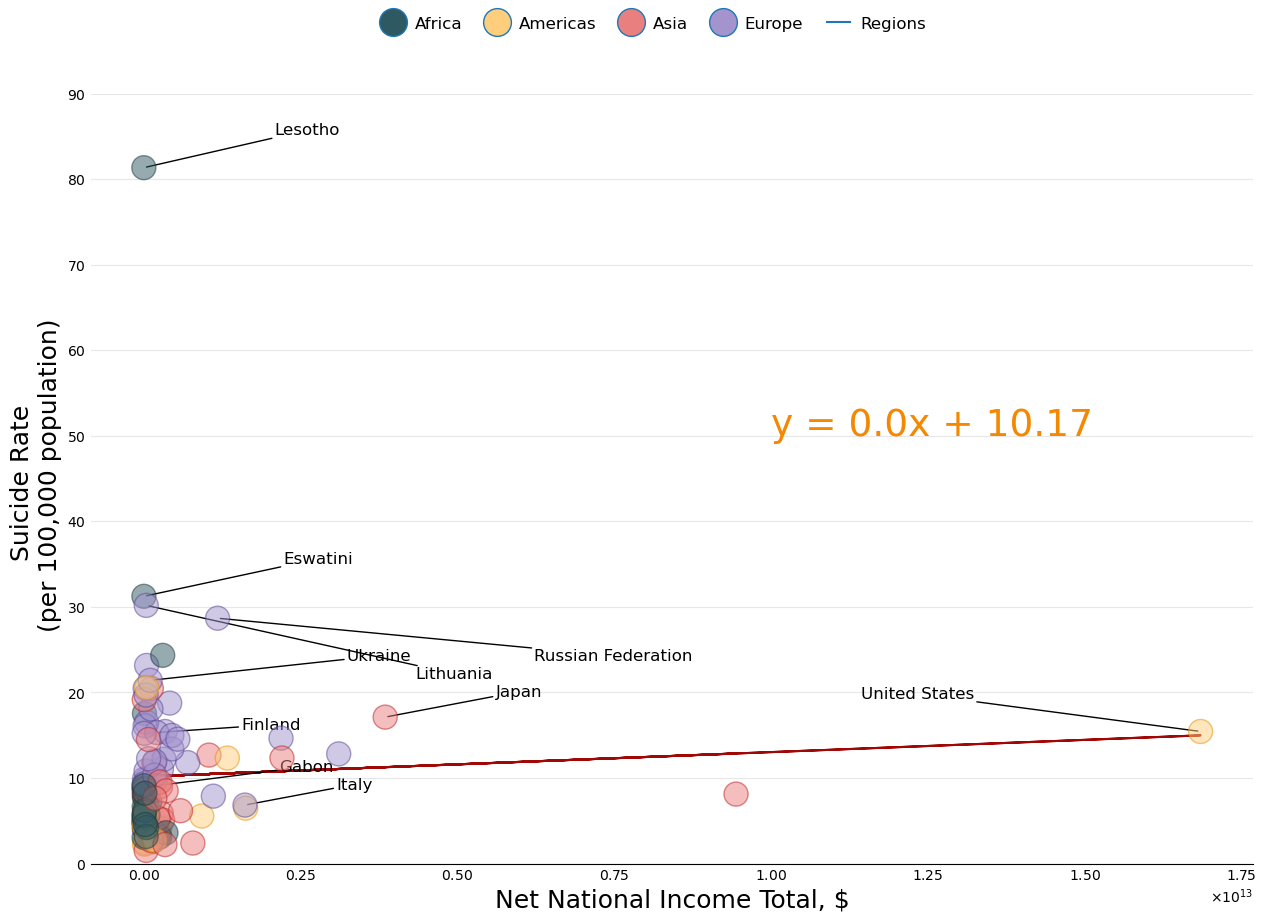

In [33]:
# Linear regression for Net Income Mean and Suicide Rate
xlbl = 'Net National Income Total, $'
ylbl = 'Suicide Rate \n (per 100,000 population)'
lblpos = (10000000000000, 50)
net_income_suic_plt = plotLinearRegression(final_mean_df['Net National Income Total'],final_mean_df['Suicide Rate'],xlbl,ylbl,lblpos)
plt.savefig('output/net_income_sui_suic_lin_reg.png', dpi=800)

The r-squared is: 0.057455175565257734


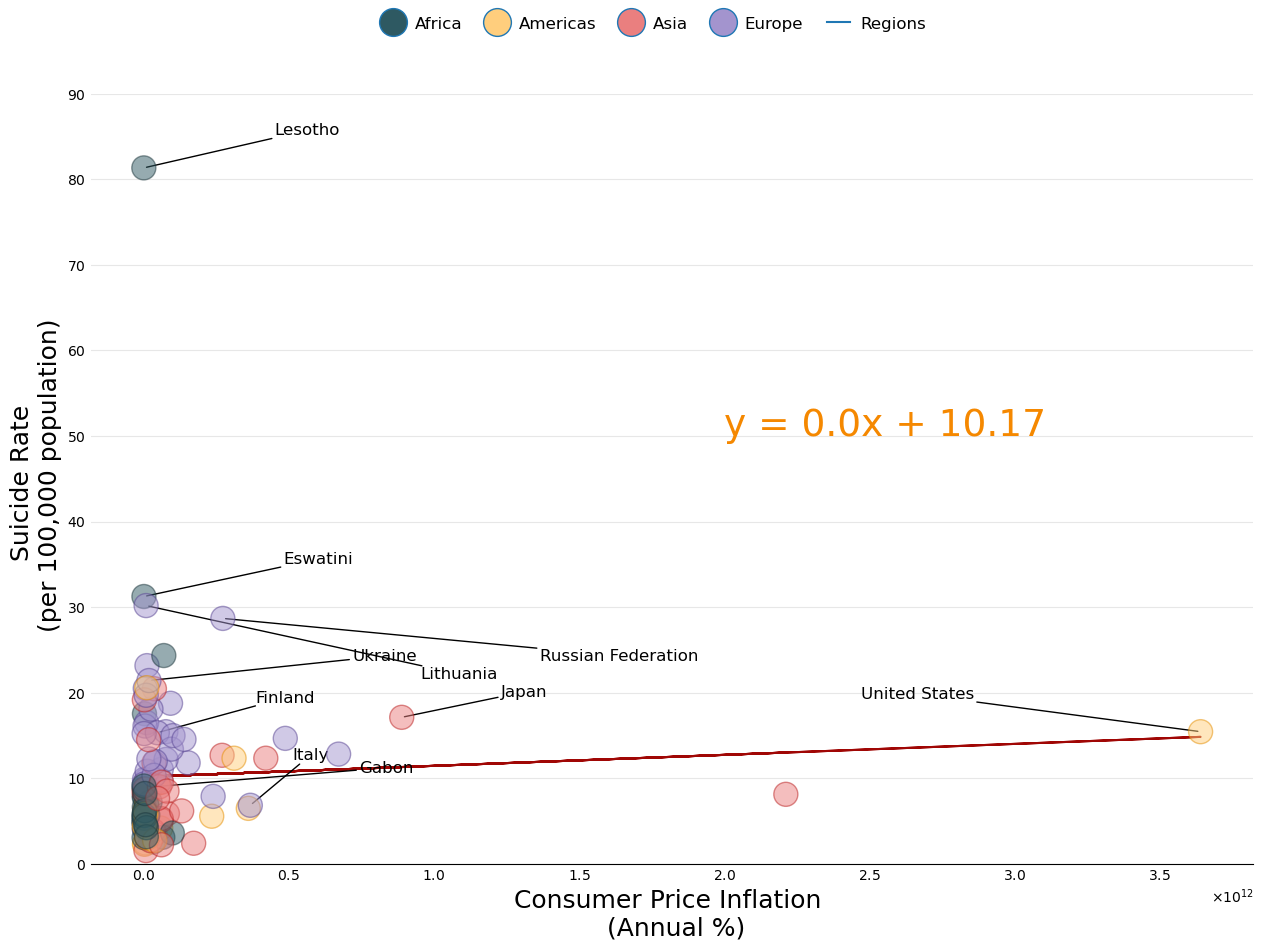

In [34]:
# Linear regression for Inflation and Suicide Rate
xlbl = 'Consumer Price Inflation \n (Annual %)'
ylbl = 'Suicide Rate \n (per 100,000 population)'
lblpos = (2000000000000, 50)
infl_suic_plt = plotLinearRegression(final_mean_df['Consumer Price Inflation'],final_mean_df['Suicide Rate'],xlbl,ylbl,lblpos)
plt.savefig('output/infl_suic_lin_reg.png', dpi=800)

The r-squared is: 0.05694930023927627


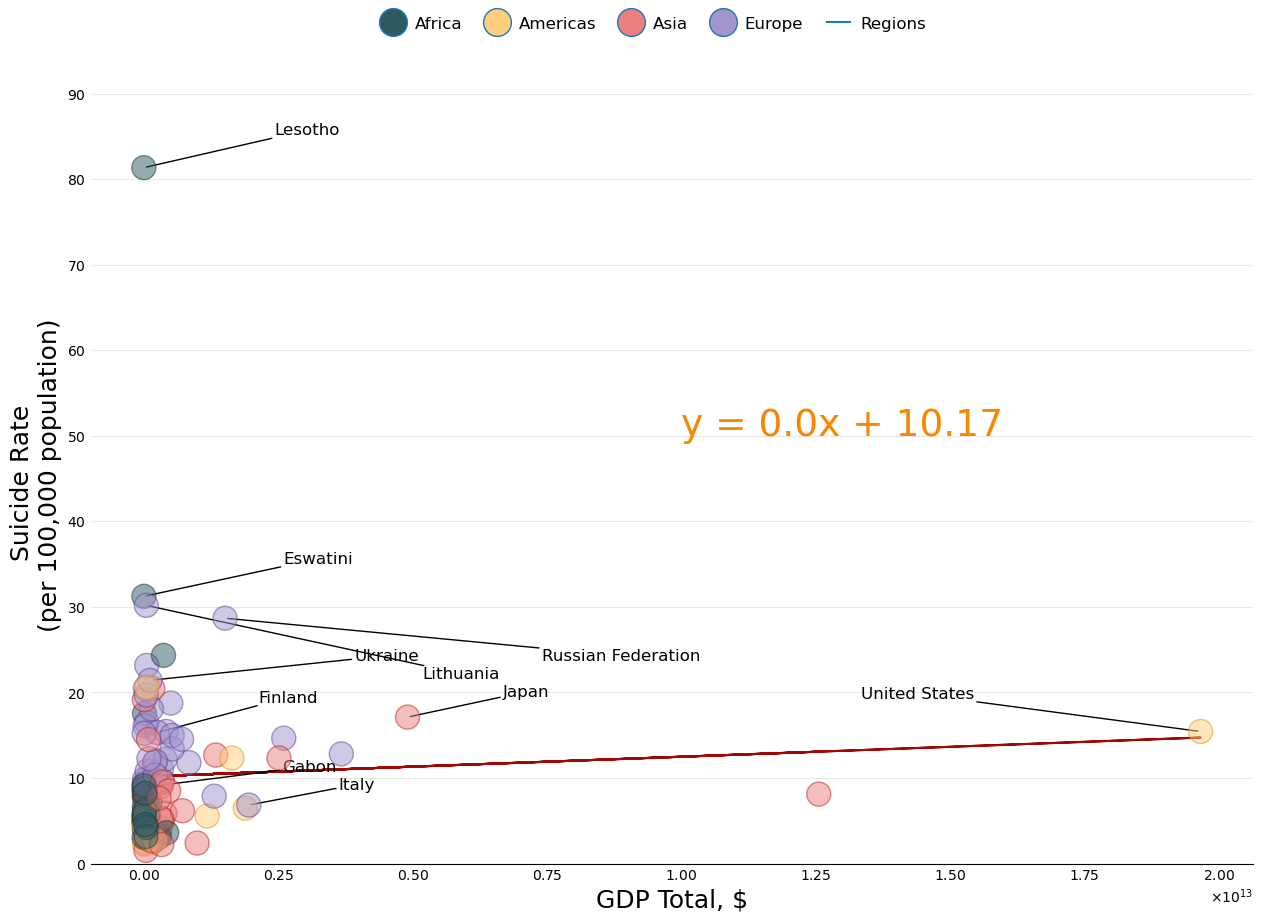

In [25]:
# Linear regression for GDP and Suicide Rate
xlbl = 'GDP Total, $'
ylbl = 'Suicide Rate \n (per 100,000 population)'
lblpos = (10000000000000, 50)
gdp_suic_plt = plotLinearRegression(final_mean_df['GDP Total'],final_mean_df['Suicide Rate'],xlbl,ylbl,lblpos)
plt.savefig('output/gdp_suic_lin_reg.png', dpi=800)